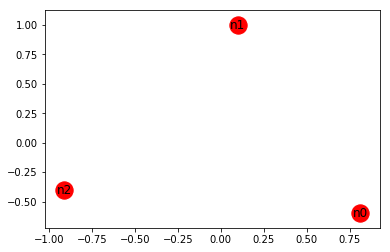

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
"""SpectralClustering의 경우는 adjcency matrix를 input으로 넘겨받는다고 생각해도 됨. 
"""
from sklearn.cluster import SpectralClustering

g = nx.Graph()
g.add_nodes_from([("n{}".format(i)) for i in range(0, 3)])


nx.draw_networkx(g)
plt.show()

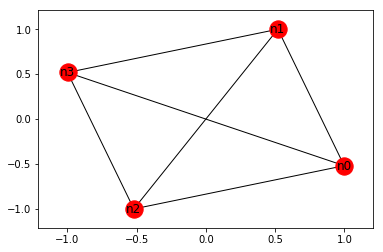

In [24]:
import numpy as np 

g = nx.Graph()
n_size = 4
g.add_nodes_from(
    ["n{}".format(i) for i in range(0, n_size)]
)
g.add_edges_from(
    ("n{}".format(i), "n{}".format(j), {'weight':0.5}) for i in range(0, n_size-1) for j in range(i+1, n_size)
)
nx.draw_networkx(g, pos=nx.spring_layout(g))
nx.draw_networkx_edges(
    
)
plt.show()

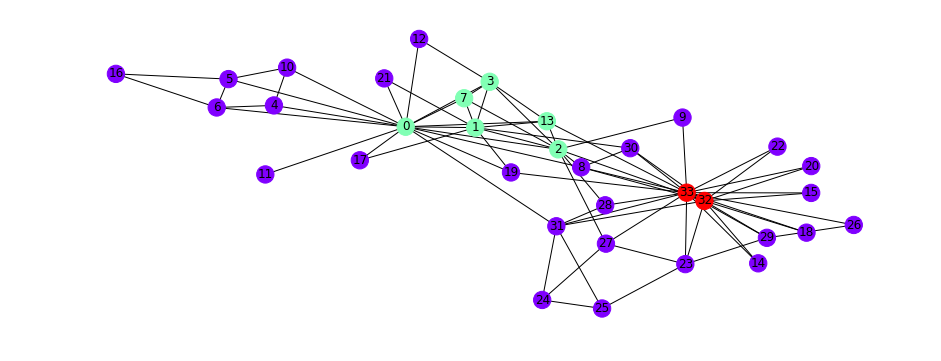

In [56]:
from sklearn.cluster import SpectralClustering

G = nx.karate_club_graph()
# update weight? how? 

# Cluster
"""
adj matrix를 바로 넘기는 경우에는 affinity='precomputed'로 해줌
아닌 경우에는 .fit 을 했을 때 adj matrix가 만들어지게 됨. 
"""
SCmodel = SpectralClustering(3, affinity='precomputed', n_init=100)
CluNums = SCmodel.fit_predict(nx.adjacency_matrix(G).toarray())

f = plt.figure(figsize=(16, 6))
nx.draw_networkx(G, pos=nx.spring_layout(G), 
                 node_color=CluNums, cmap=plt.cm.rainbow)
plt.axis('off')
plt.show()

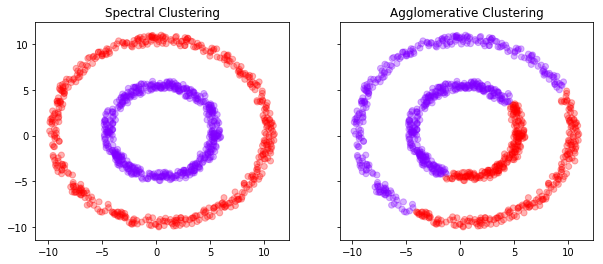

In [120]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

"""
- radius 리스트를 입력받아서, 각 반지름의 원에 위치하는 n개의 샘플을 뽑아서 x, y 리스트들을 리턴해줍니다. 
"""
def return_circle_xy(rs, n):
    xs, ys = [], []
    for r in rs:
        for i in range(0, n):
            angle = np.pi * np.random.uniform(0, 2)
            xs.append( r*np.cos(angle) + np.random.random())
            ys.append( r*np.sin(angle) + np.random.random())
    return xs, ys

x, y = return_circle_xy([10, 5], 500)
df = pd.DataFrame({"x":x, "y":y})

from sklearn.cluster import SpectralClustering, AgglomerativeClustering

f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((10, 4)) 

CluNums = SpectralClustering(n_clusters=2, n_init=10).fit_predict(df)
axes[0].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[0].set_title("Spectral Clustering")

CluNums = AgglomerativeClustering(n_clusters=2).fit_predict(df)
axes[1].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[1].set_title("Agglomerative Clustering")

plt.savefig('../../assets/images/markdown_img/spec_agg_clustering_18051202105.svg')
plt.show()

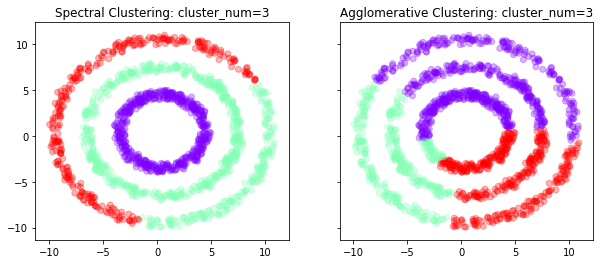

In [134]:
x, y = return_circle_xy([10, 7, 4], 500)
df = pd.DataFrame({"x":x, "y":y})

from sklearn.cluster import SpectralClustering, AgglomerativeClustering

f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((10, 4)) 

CluNums = SpectralClustering(n_clusters=3, n_init=10).fit_predict(df)
axes[0].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[0].set_title("Spectral Clustering: cluster_num=3")

CluNums = AgglomerativeClustering(n_clusters=3).fit_predict(df)
axes[1].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[1].set_title("Agglomerative Clustering: cluster_num=3")

plt.savefig('../../assets/images/markdown_img/spec_agg_clustering_18051202109.svg')
plt.show()

/Users/frhyme/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


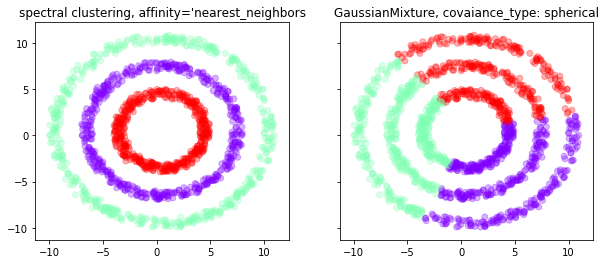

In [146]:
x, y = return_circle_xy([10, 7, 4], 500)
df = pd.DataFrame({"x":x, "y":y})

from sklearn.cluster import SpectralClustering, AgglomerativeClustering


f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((10, 4)) 

CluNums = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_init=10).fit_predict(df)
axes[0].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[0].set_title("spectral clustering, affinity='nearest_neighbors")

CluNums = GaussianMixture(n_components=3, covariance_type='spherical').fit(df).predict(df)
#covariance_type : {‘full’, ‘tied’, ‘diag’, ‘spherical’},
axes[1].scatter(x, y, c=CluNums, cmap=plt.cm.rainbow, alpha=0.3)
axes[1].set_title("GaussianMixture, covaiance_type: spherical")


plt.savefig('../../assets/images/markdown_img/spec_agg_clustering_18051202122.svg')
plt.show()

,x,y
0,3.123969,10.675310
1,8.506476,-5.283293
2,0.226896,-9.408967
3,3.334676,10.176906
4,-8.234452,-3.564874
